<a href="https://colab.research.google.com/github/andrewbeckster/Smoking-and-Tobacco-Analysis/blob/main/Smoking_and_Tobacco_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smoking and Tobacco Consumption Project --Andrew Beck


Using datasets found from the [California Open Data Portal](https://data.ca.gov/dataset/adult-cigarette-and-tobacco-use-prevalence/resource/9d1365cc-8558-4da0-9f01-326b51d83d0c)  from 1984 to 2019 and [The CDC](https://chronicdata.cdc.gov/Policy/Adult-Tobacco-Consumption-In-The-U-S-2000-Present/rnvb-cpxx/data) from 2000-2020. I perform an independent T-Test to see if there is a significant difference in smoking rates between male and female smokers. I also test the Pearson correlation coefficient between the United States population and cigarette consumption

### Import Libraries

In [1]:
!pip install opendatasets
import pandas as pd
import sqlalchemy
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


### Load Data

In [2]:
#Data for Hypothesis 1 (California Open Data Portal)
smoking_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/adult-smoking-prevalence.csv')
#Data for Hypothesis 2 (CDC)
tobacco_df1 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv')


In [3]:
female_df = smoking_df.loc[(smoking_df['GENDER']=='Female')]
male_df = smoking_df[(smoking_df['GENDER'] == 'Male')]
gender_df = smoking_df[(smoking_df['GENDER'])!= 'Total']
male_df2 = male_df[(male_df['YEAR']>= 2012)]
female_df2 = female_df[(female_df['YEAR']>= 2012)]
gender_df2 = gender_df[(gender_df['YEAR']>= 2012)]

In [4]:
tobacco_df1['Total'] = tobacco_df1['Total'].astype(int) # if first time viewing in colab, add str.replace(',','')
tobacco_df1['Population'] = tobacco_df1['Population'].astype(int) # if first time viewing in colab, add str.replace(',','')

In [5]:
tobacco_df=tobacco_df1.loc[(tobacco_df1['Measure'] == 'Cigarettes'),
                    ['Year','Population', 'Total']]

In [6]:
capita_df=tobacco_df1.loc[(tobacco_df1['Submeasure'] == 'Total Combustible Tobacco'),
                    ['Year','Population', 'Total Per Capita']]

In [34]:
capita_df['Total Per Capita'] = capita_df['Total Per Capita'].astype(float)  #if first time viewing in colab, add str.replace(',','')

## Explore Data

In [7]:
smoking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        108 non-null    int64  
 1   COMPARISON  108 non-null    object 
 2   GENDER      108 non-null    object 
 3   PERCENT     108 non-null    float64
 4   LOWER95     108 non-null    float64
 5   UPPER95     108 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.2+ KB


In [8]:
gender_df.head(25)

,YEAR,COMPARISON,GENDER,PERCENT,LOWER95,UPPER95
0,1984,Definition Expanded in 1996,Male,26.9,22.8,31.0
1,1984,Definition Expanded in 1996,Female,23.0,19.7,26.3
3,1985,Definition Expanded in 1996,Male,28.2,24.6,31.8
4,1985,Definition Expanded in 1996,Female,25.2,22.1,28.2
6,1986,Definition Expanded in 1996,Male,28.0,24.6,31.4
7,1986,Definition Expanded in 1996,Female,23.3,20.5,26.0
9,1987,Definition Expanded in 1996,Male,22.8,19.8,25.8
10,1987,Definition Expanded in 1996,Female,20.1,17.7,22.6
12,1988,Definition Expanded in 1996,Male,25.6,22.9,28.2
13,1988,Definition Expanded in 1996,Female,19.9,17.8,22.0


In [9]:
gender_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,72.000000,72.000000,72.000000,72.000000
mean,2001.500000,16.111111,14.601389,17.673611
std,10.461196,5.337419,4.797989,5.904641
min,1984.000000,6.300000,5.200000,7.400000
25%,1992.750000,12.400000,10.825000,13.800000
50%,2001.500000,15.650000,14.350000,16.650000
75%,2010.250000,19.950000,17.950000,22.000000
max,2019.000000,28.200000,24.600000,31.800000


In [10]:
female_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,36.000000,36.000000,36.000000,36.000000
mean,2001.500000,13.380556,12.072222,14.788889
std,10.535654,4.907768,4.363656,5.484616
min,1984.000000,6.300000,5.200000,7.400000
25%,1992.750000,9.525000,8.925000,10.025000
50%,2001.500000,12.750000,11.800000,14.000000
75%,2010.250000,15.800000,14.150000,17.075000
max,2019.000000,25.200000,22.100000,28.200000


In [11]:
male_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,36.000000,36.000000,36.000000,36.000000
mean,2001.500000,18.841667,17.130556,20.558333
std,10.535654,4.285549,3.807723,4.850353
min,1984.000000,11.300000,8.900000,13.800000
25%,1992.750000,15.400000,14.475000,16.600000
50%,2001.500000,18.700000,17.400000,19.950000
75%,2010.250000,21.100000,19.550000,22.625000
max,2019.000000,28.200000,24.600000,31.800000


In [12]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 106
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        72 non-null     int64  
 1   COMPARISON  72 non-null     object 
 2   GENDER      72 non-null     object 
 3   PERCENT     72 non-null     float64
 4   LOWER95     72 non-null     float64
 5   UPPER95     72 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.9+ KB


In [13]:
tobacco_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 273 non-null    int64  
 1   LocationAbbrev       273 non-null    object 
 2   LocationDesc         273 non-null    object 
 3   Population           273 non-null    int64  
 4   Topic                273 non-null    object 
 5   Measure              273 non-null    object 
 6   Submeasure           273 non-null    object 
 7   Data Value Unit      273 non-null    object 
 8   Domestic             273 non-null    object 
 9   Imports              273 non-null    object 
 10  Total                273 non-null    int64  
 11  Domestic Per Capita  273 non-null    object 
 12  Imports Per Capita   273 non-null    float64
 13  Total Per Capita     273 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 30.0+ KB


In [14]:
tobacco_df1.head(25)

,Year,LocationAbbrev,LocationDesc,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,US,National,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,"45,502,156","91,965",45594121,0.217,0.0,0.217
1,2000,US,National,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,"423,250,355,675","12,319,663,000",435570018675,"2,018",59.0,"2,076"
2,2000,US,National,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,"5,612,867,329","548,243,000",6161110329,27,3.0,29
3,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,"8,291,276,800","702,741,662",8994018462,40,3.0,43
4,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,"16,841,656","1,427,444",18269100,0,0.0,0
5,2000,US,National,209786736,Combustible Tobacco,Cigars,Small Cigars,Cigars,"2,243,135,044","36,049,000",2279184044,11,0.0,11
6,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Pipe Tobacco,Pounds,"5,352,683","739,887",6092570,0,0.0,0
7,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Roll-Your-Own Tobacco,Cigarette Equivalents,"5,656,109,785","338,489,600",5994599385,27,2.0,29
8,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Roll-Your-Own Tobacco,Pounds,"11,488,973","687,557",12176530,0,0.0,0
9,2000,US,National,209786736,Combustible Tobacco,Cigars,Large Cigars,Cigars,"3,369,732,285","512,194,000",3881926285,16,2.0,19


In [15]:
capita_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 12 to 260
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              21 non-null     int64 
 1   Population        21 non-null     int64 
 2   Total Per Capita  21 non-null     object
dtypes: int64(2), object(1)
memory usage: 672.0+ bytes


In [16]:
tobacco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 261
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        21 non-null     int64
 1   Population  21 non-null     int64
 2   Total       21 non-null     int64
dtypes: int64(3)
memory usage: 672.0 bytes


In [17]:
tobacco_df.describe()

,Year,Population,Total
count,21.000000,2.100000e+01,2.100000e+01
mean,2010.000000,2.345479e+08,3.209763e+11
std,6.204837,1.512359e+07,7.091578e+10
min,2000.000000,2.097867e+08,2.234329e+11
25%,2005.000000,2.220040e+08,2.626813e+11
50%,2010.000000,2.351539e+08,3.004508e+11
75%,2015.000000,2.477737e+08,3.810984e+11
max,2020.000000,2.566620e+08,4.355700e+11


##Hypothesis 1

My first Hypothesis is that there is a significant statistical difference between male and female smoking rates. Tested at the 95% confidence level, there should be a p value less than .05.

In [18]:
stats.ttest_ind(male_df['PERCENT'], female_df['PERCENT'])

Ttest_indResult(statistic=5.029011363941247, pvalue=3.648713070998553e-06)

Text(0.5, 0, 'Gender')

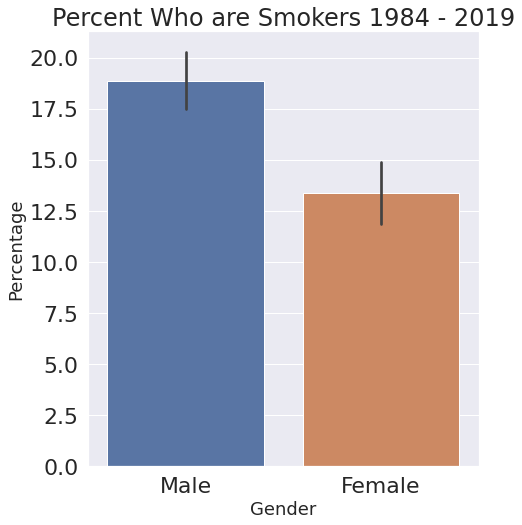

In [19]:
plt.figure(figsize=(7, 8))
sns.set(font_scale = 2)
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df)
ax.set_title('Percent Who are Smokers 1984 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 18)
ax.set_xlabel("Gender", size = 18)

In [20]:
stats.ttest_ind(male_df2['PERCENT'], female_df2['PERCENT'])

Ttest_indResult(statistic=8.516432640155626, pvalue=6.562754402337885e-07)

Text(0.5, 0, 'Gender')

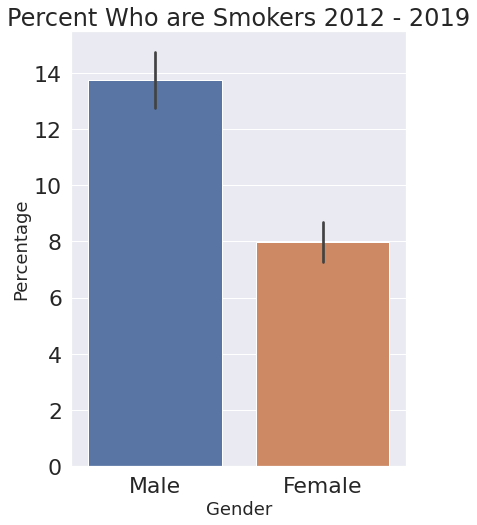

In [21]:
plt.figure(figsize=(6, 8))
sns.set(font_scale= 2)
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df2)
ax.set_title('Percent Who are Smokers 2012 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 18)
ax.set_xlabel("Gender", size = 18)

##Findings of Hypothesis 1
The first T-test of smokers from 1984 - 2019 shows a significant difference betweeen male and female smokers,  with p < . 01. The second T-test of data from  smokers from 2012 to 2019 also has similiar results.  The barplot shows males are signficiantly more likely to be smokers than females. **Supports The Hypothesis**

##Hypothesis 2
There will be no correlation between Population Size and Tobacco Consumption. Tobacco consumption is measured in cigarettes and cigarette euqivalents

Text(0, 0.5, 'Cigarretes Per capita')

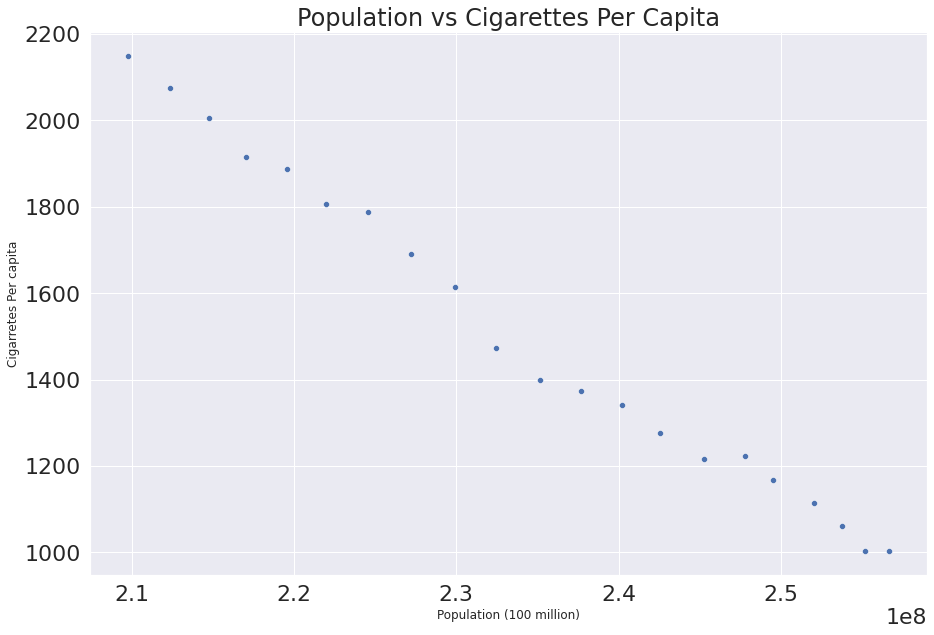

In [32]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total Per Capita', x='Population', data=capita_df)
ax.set_title("Population vs Cigarettes Per Capita", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Cigarretes Per capita", size = 12)

In [31]:
stats.pearsonr(capita_df['Population'], capita_df['Total Per Capita'])

(-0.9943249426768399, 5.88661118680104e-20)

Text(0, 0.5, 'Total Combustible Tobacco (in 10 billion cigarette equivalents)')

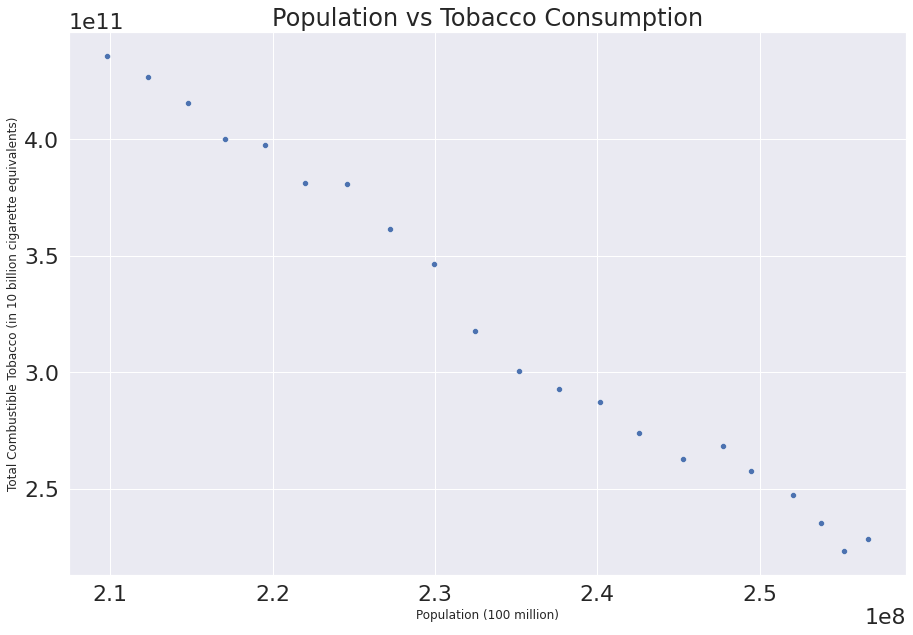

In [25]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total', x='Population', data=tobacco_df)
ax.set_title("Population vs Tobacco Consumption", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Total Combustible Tobacco (in 10 billion cigarette equivalents)", size = 12)

In [28]:
stats.pearsonr(tobacco_df['Population'], tobacco_df['Total'])

(-0.9925149362870732, 8.109128187333502e-19)

##Findings from Hypothesis 2
According to our scatter plots, there is a strong negative correlation between population and cigarette consumption. This is further supported with a Pearson correlation coefficent less than -0.99 in both tests. **Rejects The Hypothesis**
